# Homework 4 - MLE & MAP

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import data
import scipy 
from sklearn.model_selection import train_test_split

In [109]:
def generate_dataset(K, a, b, var, N):

    theta_true = np.ones(K)

    X = np.random.uniform(a, b, N)

    #Phi is the vander matrix created from X and K
    Phi = np.vander(X, K, increasing=True)

    #normal distribution of noise
    noise = np.random.normal(0, np.sqrt(var), N)

    #definition of Y
    Y = Phi @ theta_true + noise

    return X, Y, Phi

a, b = -1, 1 
var = 0.02  
N = 1000
X, Y, Phi = generate_dataset(3, a, b, var, N)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


print(Phi)

[[ 1.          0.27797152  0.07726817]
 [ 1.         -0.42724912  0.18254181]
 [ 1.          0.35383624  0.12520008]
 ...
 [ 1.         -0.12681781  0.01608276]
 [ 1.         -0.05424154  0.00294214]
 [ 1.          0.26003001  0.06761561]]


AVG error test K:1 = 0.40263764384187545
AVG error test K:2 = 0.10480388958610797
AVG error test K:4 = 0.026521534508660363
AVG error test K:6 = 0.028050847761926307


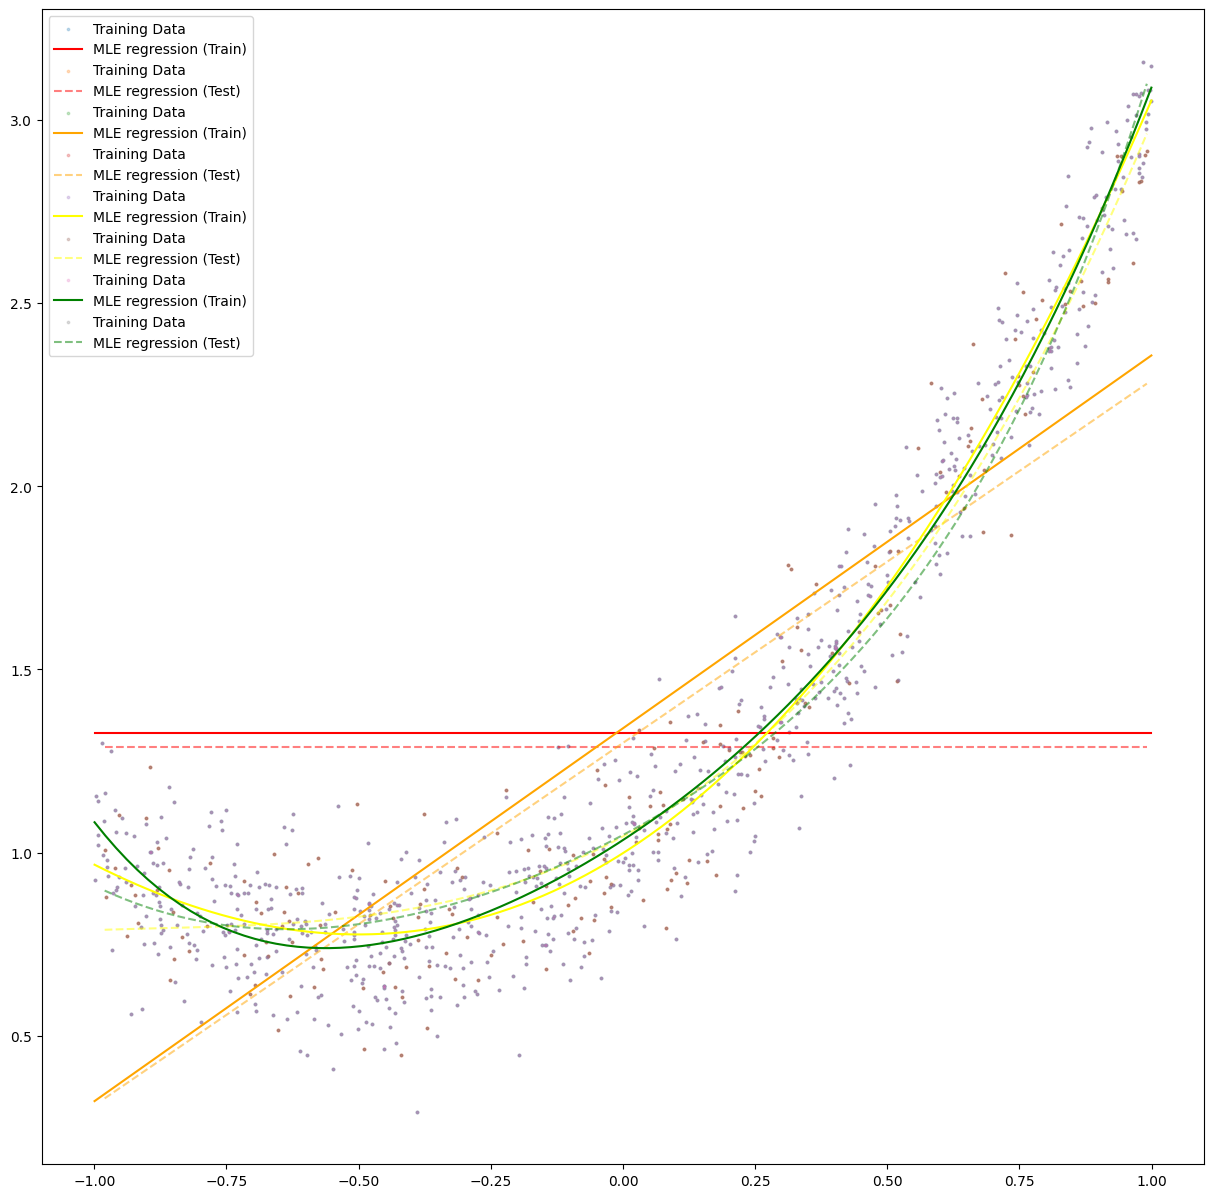

In [110]:
def avg_absolute_error(theta, X, Y, K):
    Phi_X = vandermonde_matrix(X, K)
    predictions = Phi_X @ theta
    return (1 / Y.shape[0]) * np.linalg.norm(predictions - Y, 2)**2

def compute_absolute_error(theta, X, Y):

    predictions = linear_regression(X, theta)
    error = np.mean(np.abs(predictions - Y))
    return error

def linear_regression(X, theta):
    return X @ theta

def vandermonde_matrix(X, K):
    return np.vander(X, K, increasing=True)

def loss(theta, Phi_X, Y):
    predictions = Phi_X @ theta
    return 0.5 * np.linalg.norm(predictions - Y)**2

def grad_loss(theta, Phi_X, Y):
    predictions = Phi_X @ theta
    return -Phi_X.T @ (Y - predictions)

def mle_solution(X, Y, K, learning_rate=0.0001, num_iterations=1000):
    theta = np.zeros(K)  # Inizializzazione di theta a zero o con valori casuali
    
    Phi_X = vandermonde_matrix(X, K)
    
    for _ in range(num_iterations):
        gradient = grad_loss(theta, Phi_X, Y)
        theta = theta - learning_rate * gradient
    
    return theta


def plot_regression_model(X, Y, theta, K, label, color, line, a):
    plt.scatter(X, Y, label='Training Data', alpha=0.25, s=3)

    X_plot = np.linspace(min(X), max(X), 100)
    Phi_plot = vandermonde_matrix(X_plot, K)
    Y_plot = linear_regression(Phi_plot, theta)

    # Plot the regression model
    plt.plot(X_plot, Y_plot, label=label, color=color, linestyle=line, alpha=a)

theta_mle_train_final = []
theta_mle_test_final = []
i = 0
color_plot = ['red', 'orange','yellow' , 'green']

plt.figure(figsize=(15,15))
error_test_final = []
error_train_final = []

for K in [1,2,4,6]:
    theta_mle_train = mle_solution(X_train, Y_train, K)
    theta_mle_test = mle_solution(X_test, Y_test, K)
    theta_mle_train_final.append(theta_mle_train)
    theta_mle_test_final.append(theta_mle_test_final)
    # Plot del modello
    plot_regression_model(X_train, Y_train, theta_mle_train, K, 'MLE regression (Train)', color_plot[i],'solid', 1.0)
    plot_regression_model(X_test, Y_test, theta_mle_test, K, 'MLE regression (Test)', color_plot[i],'dashed', 0.5)
    
    error_test = avg_absolute_error(theta_mle_test, X_test, Y_test, K)
    error_train = avg_absolute_error(theta_mle_train, X_train, Y_train, K)
    error_train_final.append(error_train)
    error_test_final.append(error_test)
    print(f"AVG error test K:{K} = {error_test}")



    i += 1
plt.legend()
plt.show()



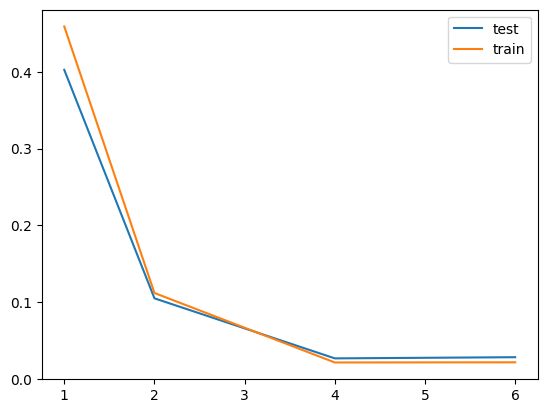

In [111]:
plt.figure()
x = [1,2,4,6]
plt.plot(x,error_test_final,label='test')
plt.plot(x,error_train_final,label='train')
plt.legend()
plt.show()

In [112]:
    
def loss_map(theta, Phi_X, Y, lambda_value):
    predictions = Phi_X @ theta
    regularization_term = 0.5 * lambda_value * np.linalg.norm(theta)**2
    return 0.5 * np.linalg.norm(predictions - Y)**2 + regularization_term

def grad_loss_map(theta, Phi_X, Y, lambda_value):
    predictions = Phi_X @ theta
    regularization_term = lambda_value * theta
    return -Phi_X.T @ (Y - predictions) + regularization_term

def map_solution(X, Y, K, lambda_value, learning_rate=0.0001, num_iterations=1000):
    theta = np.zeros(K)  
    Phi_X = vandermonde_matrix(X, K)
    
    for _ in range(num_iterations):
        gradient = grad_loss_map(theta, Phi_X, Y, lambda_value)
        theta = theta - learning_rate * gradient
    
    return theta


AVG error test K:1 = 0.40263805901783273
AVG error test K:2 = 0.10480745030969776
AVG error test K:3 = 0.02372333969555066
AVG error test K:4 = 0.026565046313391644


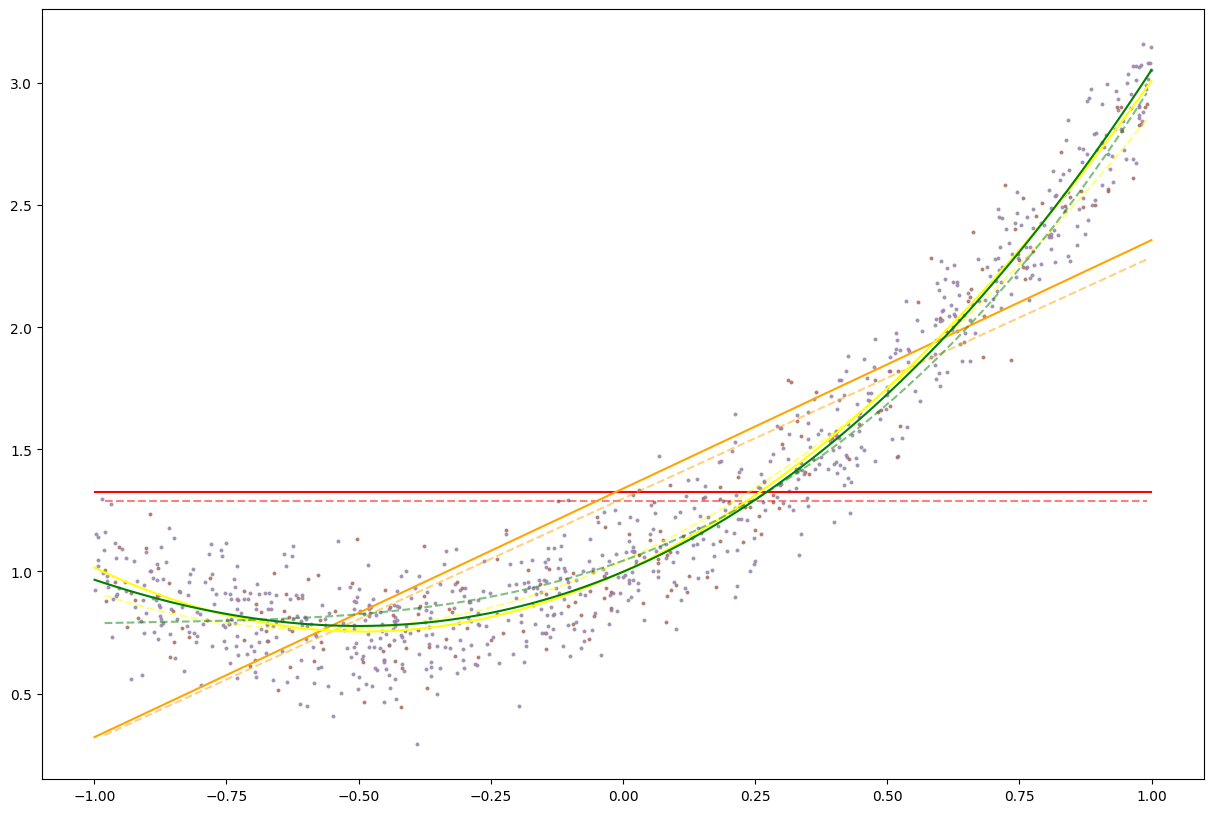

AVG error test K:1 = 0.40264426674997944
AVG error test K:2 = 0.10483268018577717
AVG error test K:3 = 0.023849120939700874
AVG error test K:4 = 0.02670638435077716


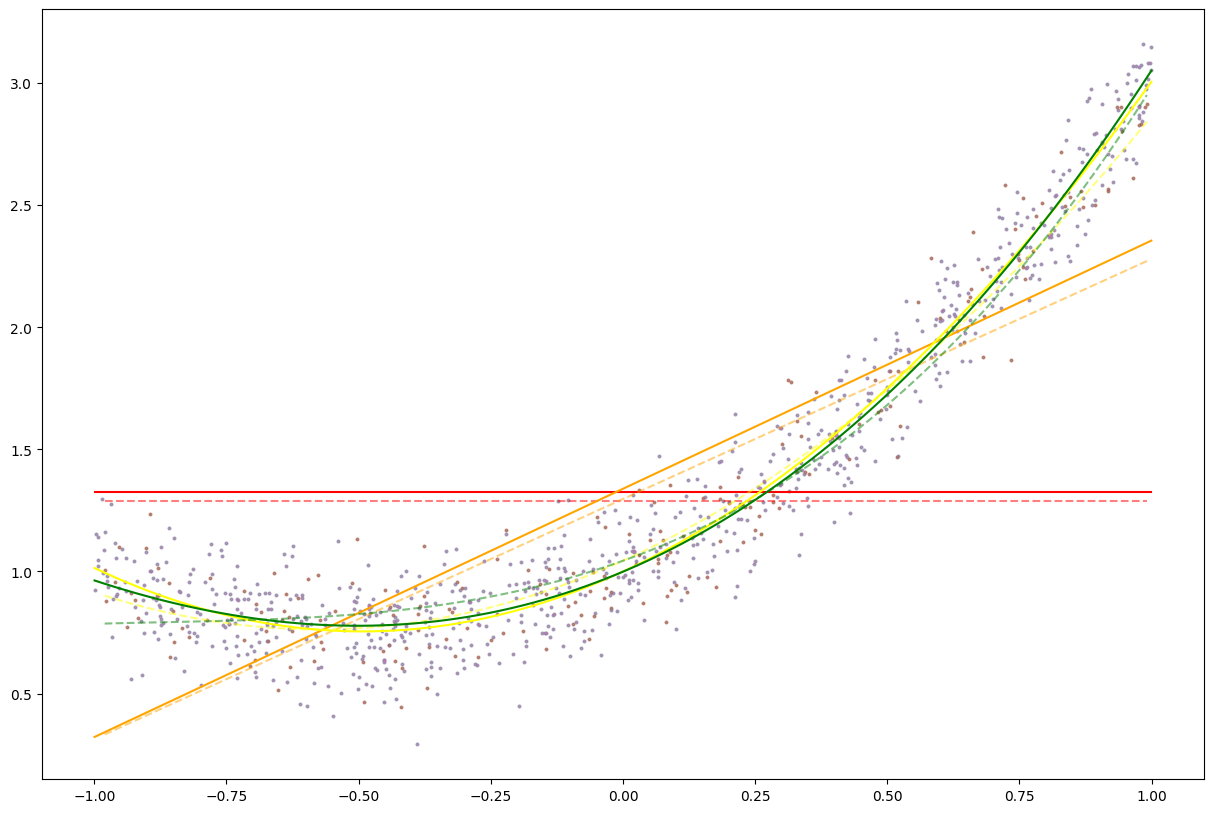

AVG error test K:1 = 0.4026578658929536
AVG error test K:2 = 0.10487936349161142
AVG error test K:3 = 0.023997627359561804
AVG error test K:4 = 0.026863622301476636


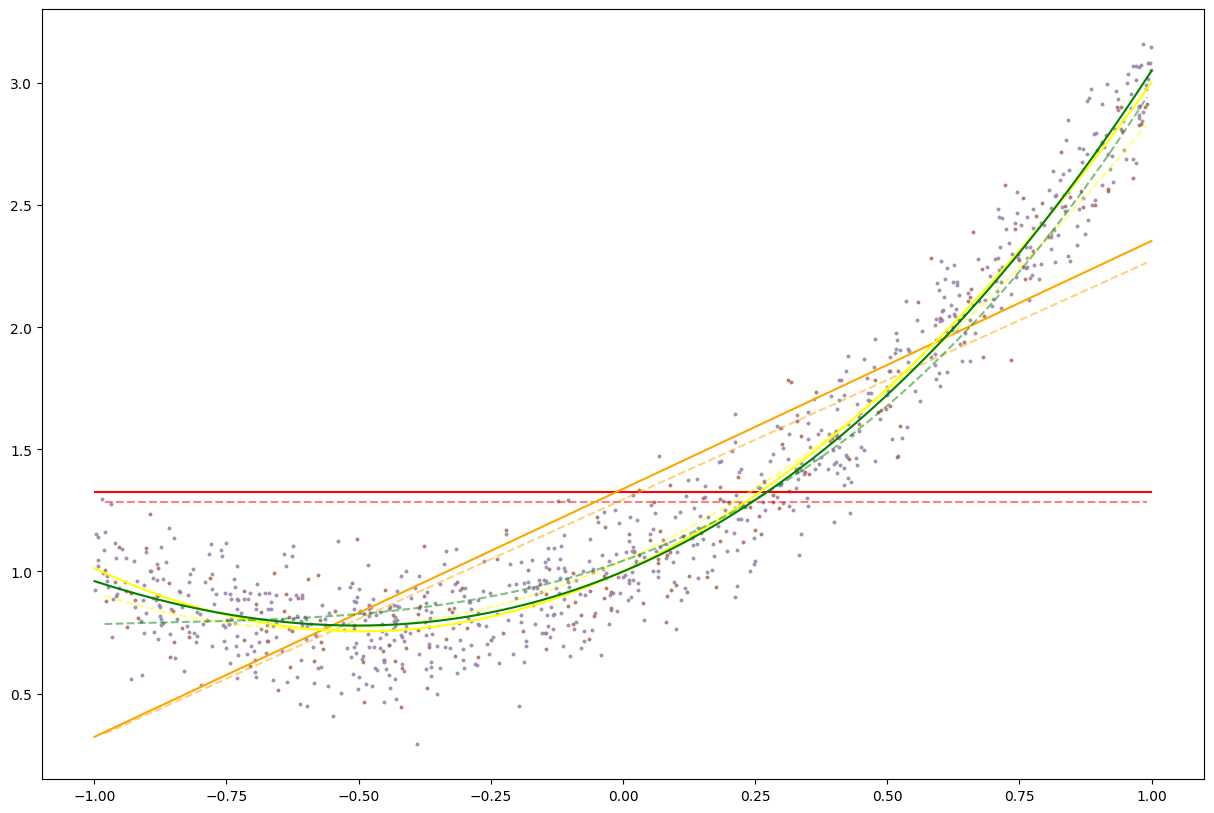

AVG error test K:1 = 0.402678790221463
AVG error test K:2 = 0.10494703660831066
AVG error test K:3 = 0.024168238873299896
AVG error test K:4 = 0.02703637965706669


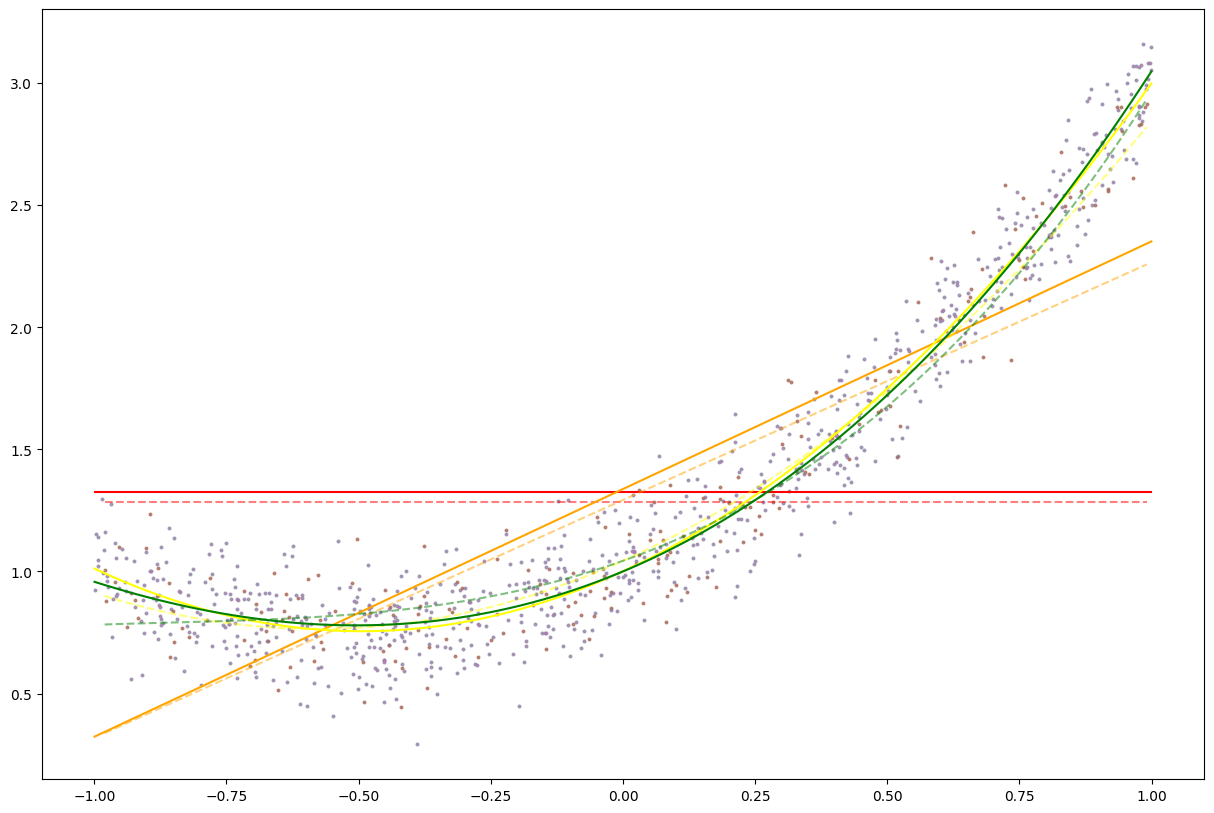

In [113]:
theta_map_train_final = []
theta_map_test_final = []
error_train_final_map = []
error_test_final_map = []



for lambda_value in np.linspace(0.1, 1, 4):
    plt.figure(figsize=(15,10))
    i = 0
    color_plot = ['red', 'orange','yellow' , 'green']
    for K in [1,2,3,4]:
        theta_map_train = map_solution(X_train, Y_train, K, lambda_value)
        theta_map_test = map_solution(X_test, Y_test, K, lambda_value)
        theta_map_train_final.append(theta_map_train)
        theta_map_test_final.append(theta_map_test_final)

        plot_regression_model(X_train, Y_train, theta_map_train, K, 'MAP regression (Train)', color_plot[i],'solid', 1.0)
        plot_regression_model(X_test, Y_test, theta_map_test, K, 'MAP regression (Test)', color_plot[i],'dashed', 0.5)
        
        error_test = avg_absolute_error(theta_map_test, X_test, Y_test, K)
        error_train = avg_absolute_error(theta_map_train, X_train, Y_train, K)
        error_train_final_map.append(error_train)
        error_test_final_map.append(error_test)
        i += 1

        print(f"AVG error test K:{K} = {error_test}")
    plt.show()

AVG error test K:4 = 0.026565046313391644
AVG error test K:60 = 0.027345758639494427


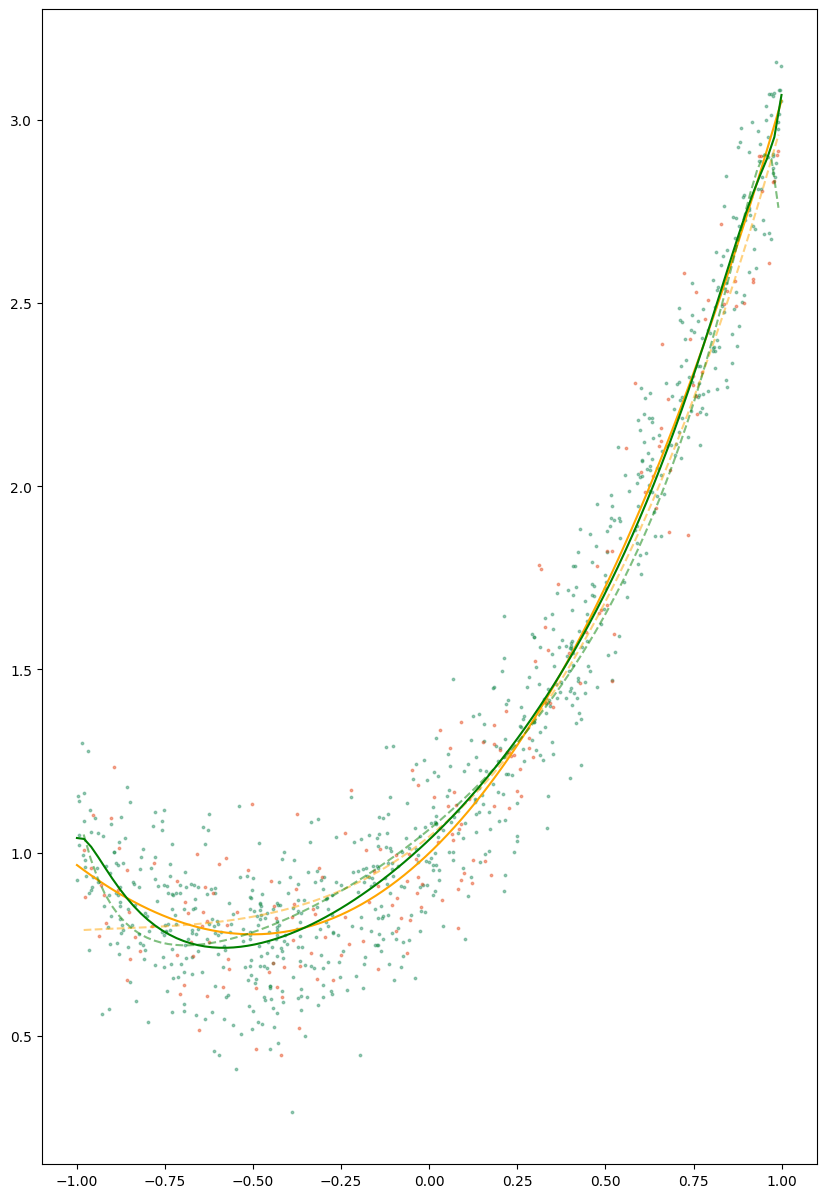

AVG error test K:4 = 0.02670638435077716
AVG error test K:60 = 0.027481095314669995


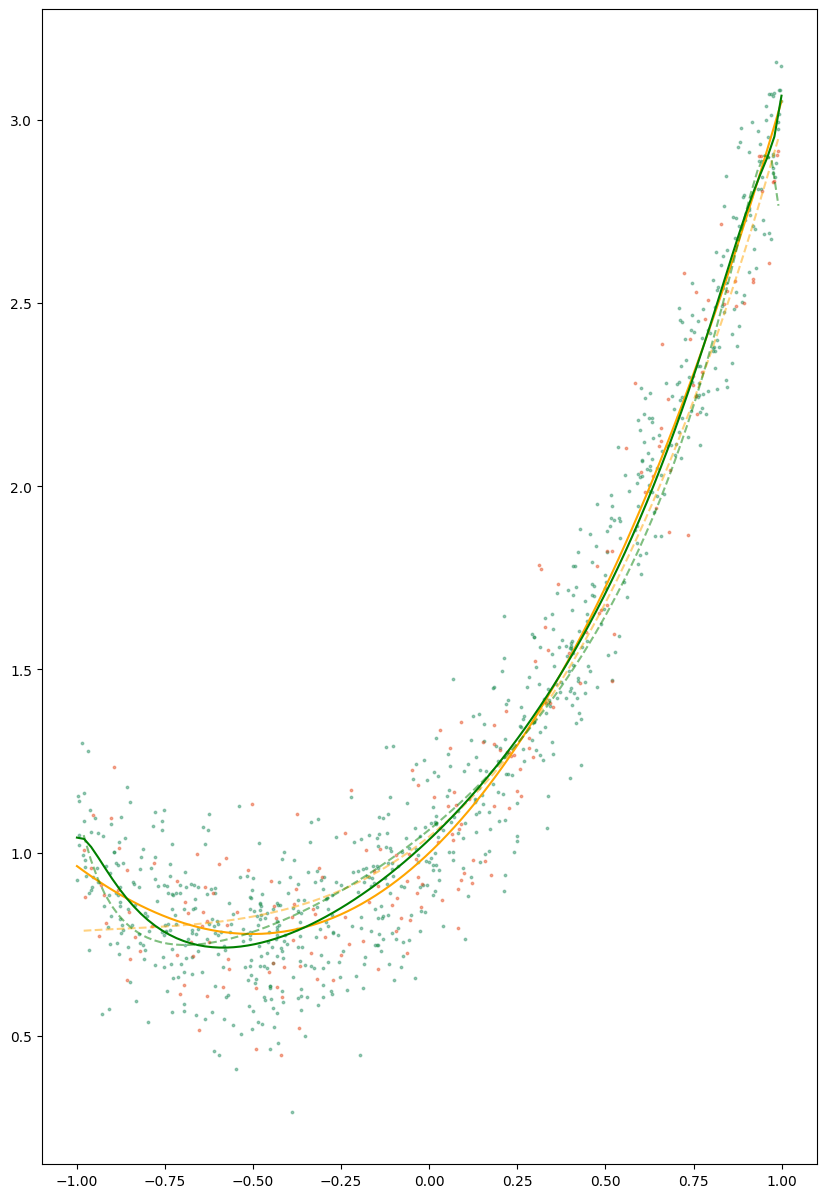

AVG error test K:4 = 0.026863622301476636
AVG error test K:60 = 0.027632364089824002


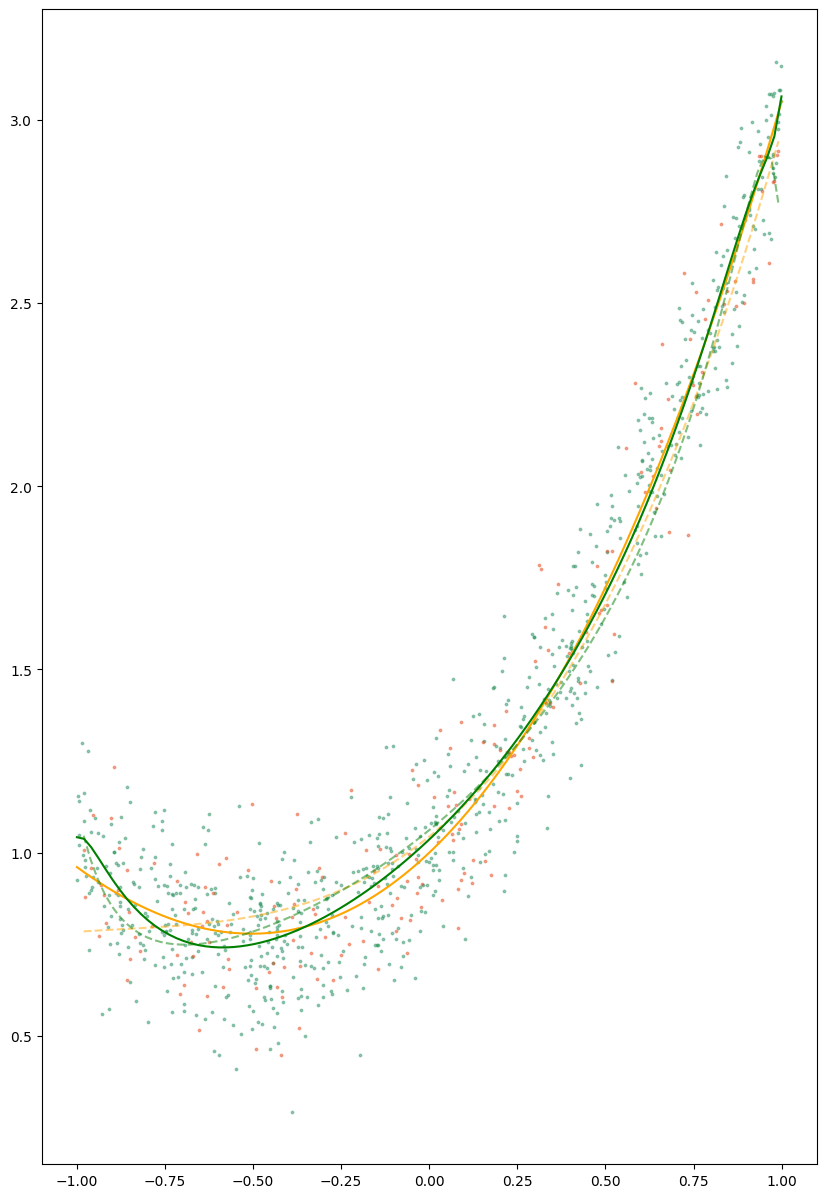

AVG error test K:4 = 0.02703637965706669
AVG error test K:60 = 0.027799086386303493


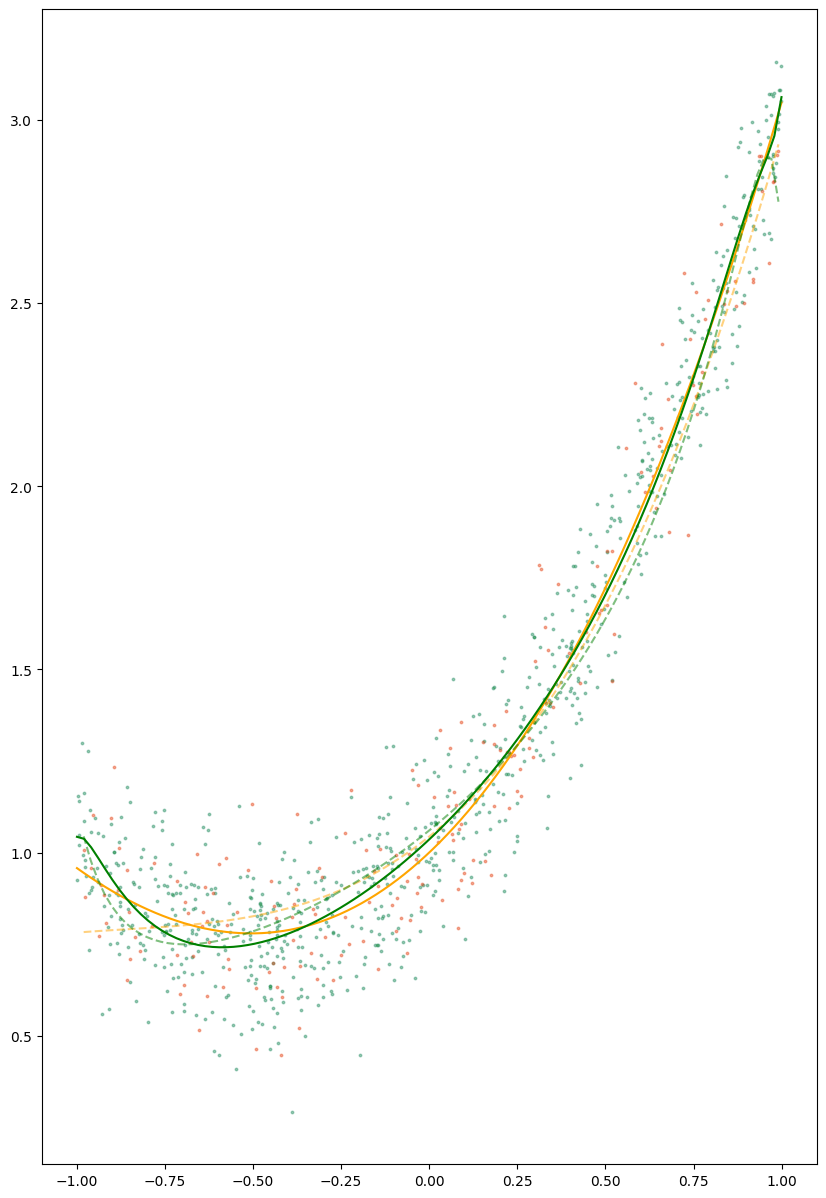

In [114]:
for lambda_value in np.linspace(0.1, 1, 4):
    plt.figure(figsize=(10,15))
    i = 0
    color_plot = ['orange', 'green']
    for K in [4, 60]:
        theta_map_train = map_solution(X_train, Y_train, K, lambda_value)
        theta_map_test = map_solution(X_test, Y_test, K, lambda_value)
        theta_map_train_final.append(theta_map_train)
        theta_map_test_final.append(theta_map_test_final)

        plot_regression_model(X_train, Y_train, theta_map_train, K, 'MAP regression (Train)', color_plot[i],'solid', 1.0)
        plot_regression_model(X_test, Y_test, theta_map_test, K, 'MAP regression (Test)', color_plot[i],'dashed', 0.5)
        
        error_test = avg_absolute_error(theta_map_test, X_test, Y_test, K)
        error_train = avg_absolute_error(theta_map_train, X_train, Y_train, K)
        error_train_final_map.append(error_train)
        error_test_final_map.append(error_test)
        i += 1

        print(f"AVG error test K:{K} = {error_test}")
    plt.show()

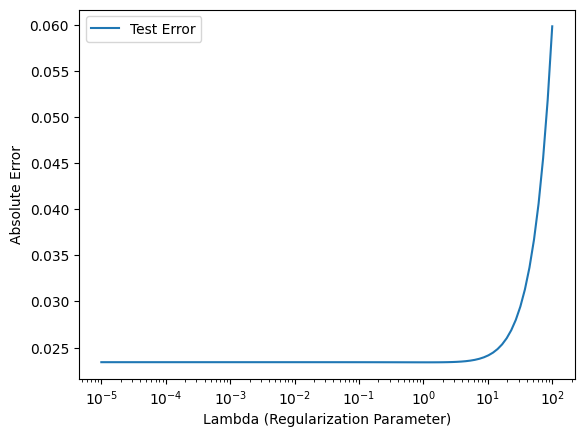

In [115]:

def compute_error_for_different_lambda(X_train, Y_train, X_test, Y_test, K, max_lambda):
    
    test_errors = []

    for lambda_value in np.logspace(-5, 2, max_lambda):
        # MAP polynomial regression with regularization
        theta_map = map_solution(X_train, Y_train, K, lambda_value)

        # Compute test error
        test_error = avg_absolute_error(theta_map, X_test, Y_test, K)
        test_errors.append(test_error)

    return test_errors

def plot_errors_with_respect_to_lambda(test_errors, max_lambda):
   
    lambda_values = np.logspace(-5, 2, max_lambda)

    plt.plot(lambda_values, test_errors, label='Test Error')
    plt.xscale('log')
    plt.xlabel('Lambda (Regularization Parameter)')
    plt.ylabel('Absolute Error')
    plt.legend()
    plt.show()

#testing the functions
K = 4
max_lambda = 100
test_err_map = compute_error_for_different_lambda(X_train, Y_train, X_test, Y_test, K, max_lambda)
plot_errors_with_respect_to_lambda(test_err_map, max_lambda)

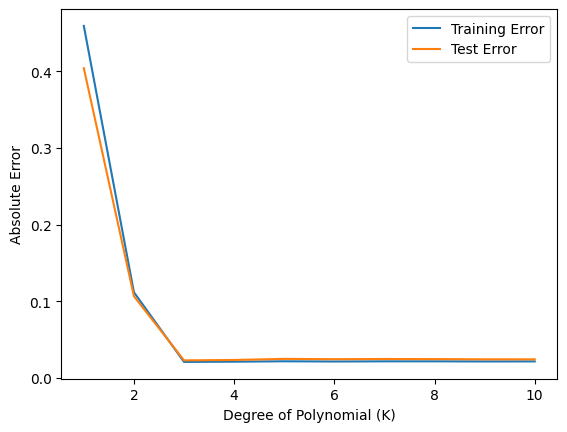

In [116]:
def compute_errors_for_different_K(X_train, Y_train, X_test, Y_test, max_K):
    
    training_errors = []
    test_errors = []

    for K in range(1, max_K + 1):
        # MLE polynomial regression
        theta_mle = mle_solution(X_train, Y_train, K)

        # Compute training error
        training_error = avg_absolute_error(theta_mle, X_train, Y_train, K)
        training_errors.append(training_error)

        # Compute test error
        test_error = avg_absolute_error(theta_mle, X_test, Y_test, K)
        test_errors.append(test_error)

    return training_errors, test_errors

def plot_errors_with_respect_to_K(training_errors, test_errors):
    
    K_values = range(1, len(training_errors) + 1)

    plt.plot(K_values, training_errors, label='Training Error')
    plt.plot(K_values, test_errors, label='Test Error')
    plt.xlabel('Degree of Polynomial (K)')
    plt.ylabel('Absolute Error')
    plt.legend()
    plt.show()

tr_err, test_err = compute_errors_for_different_K(X_train, Y_train, X_test, Y_test, 10)
plot_errors_with_respect_to_K(tr_err, test_err)

AVG error test K:1 = 0.5543745132018388
AVG error test K:2 = 0.23293535185375358
AVG error test K:4 = 0.09230352767735717
AVG error test K:6 = 0.06432264609218355


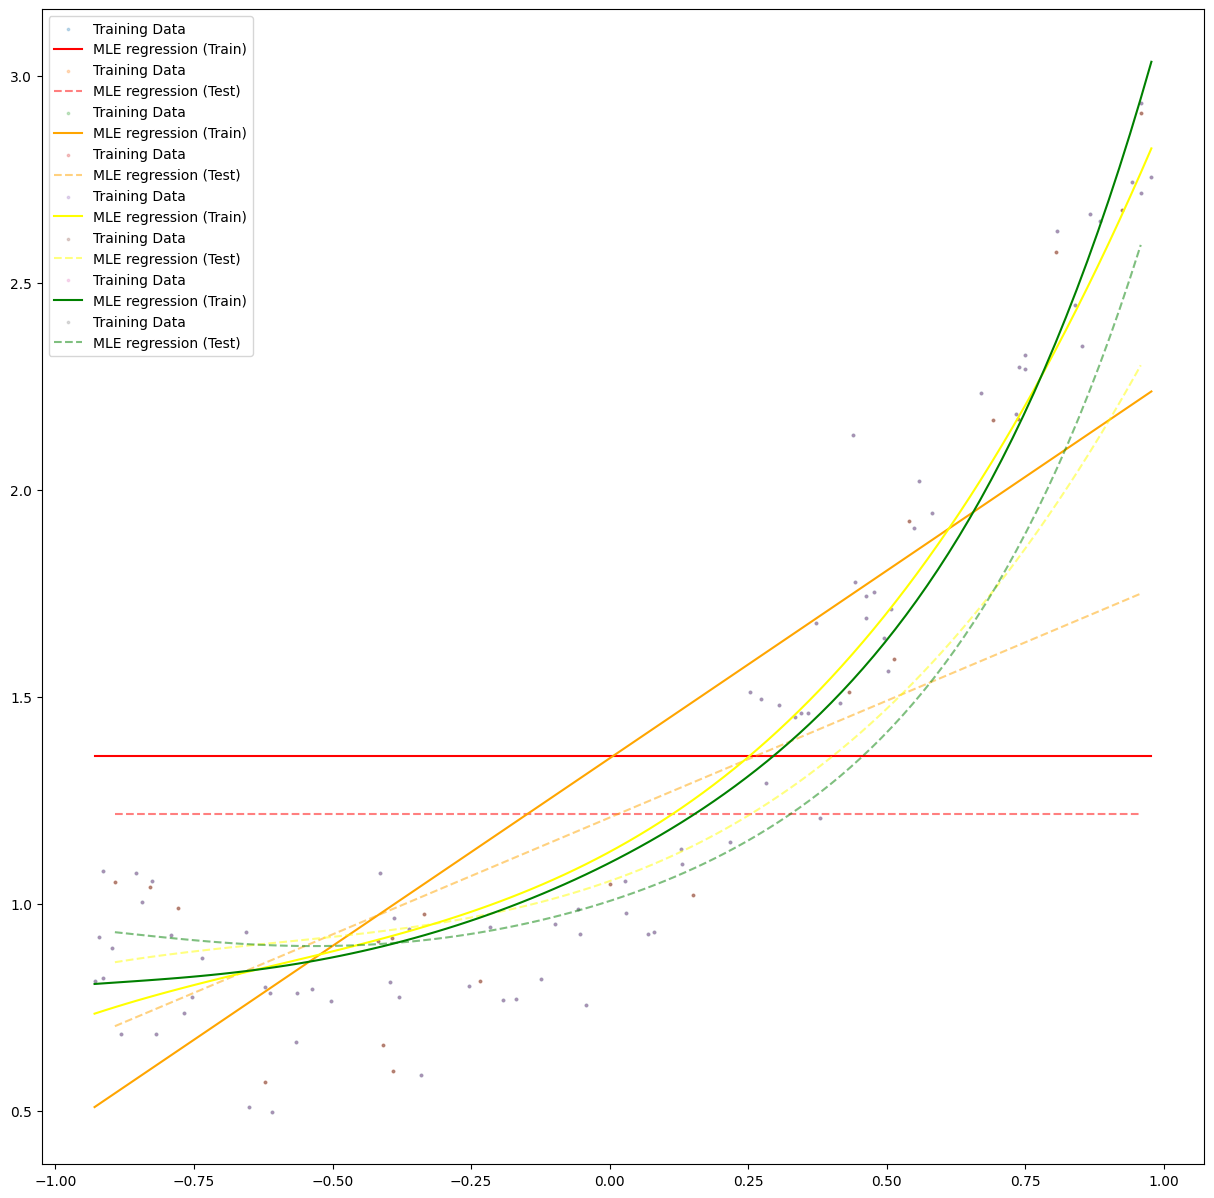

AVG error test K:1 = 0.4174597201945064
AVG error test K:2 = 0.11459285737749182
AVG error test K:4 = 0.020187820892684626
AVG error test K:6 = 0.021086738666310726


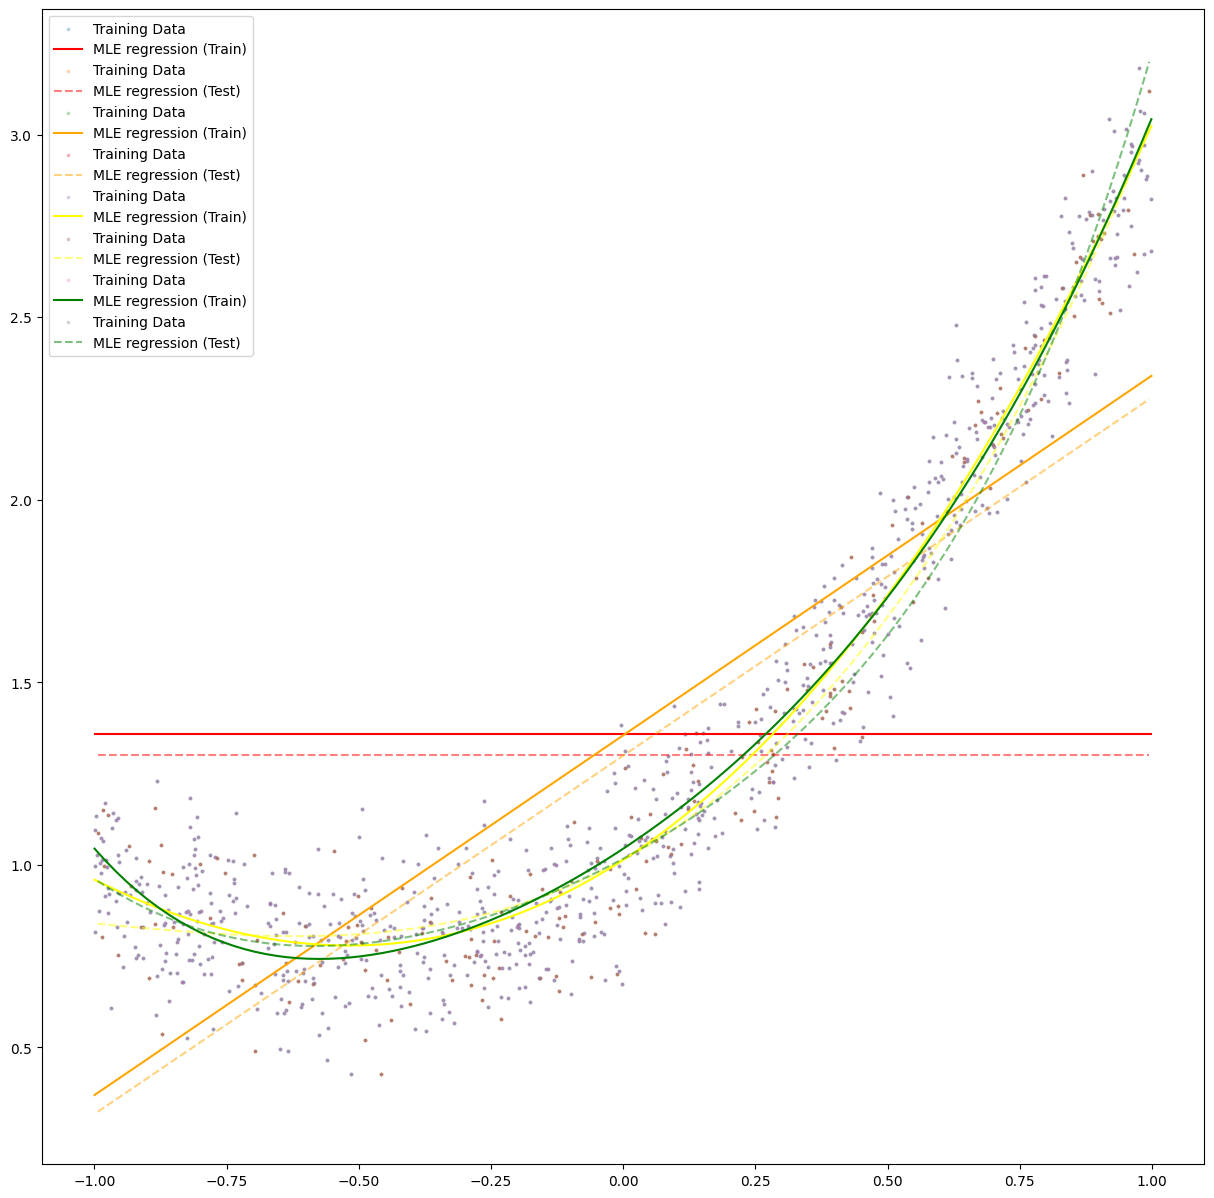

AVG error test K:1 = 0.40156416982032794
AVG error test K:2 = 0.1045795231059218
AVG error test K:4 = 0.020218970204458418
AVG error test K:6 = 0.020896388794907295


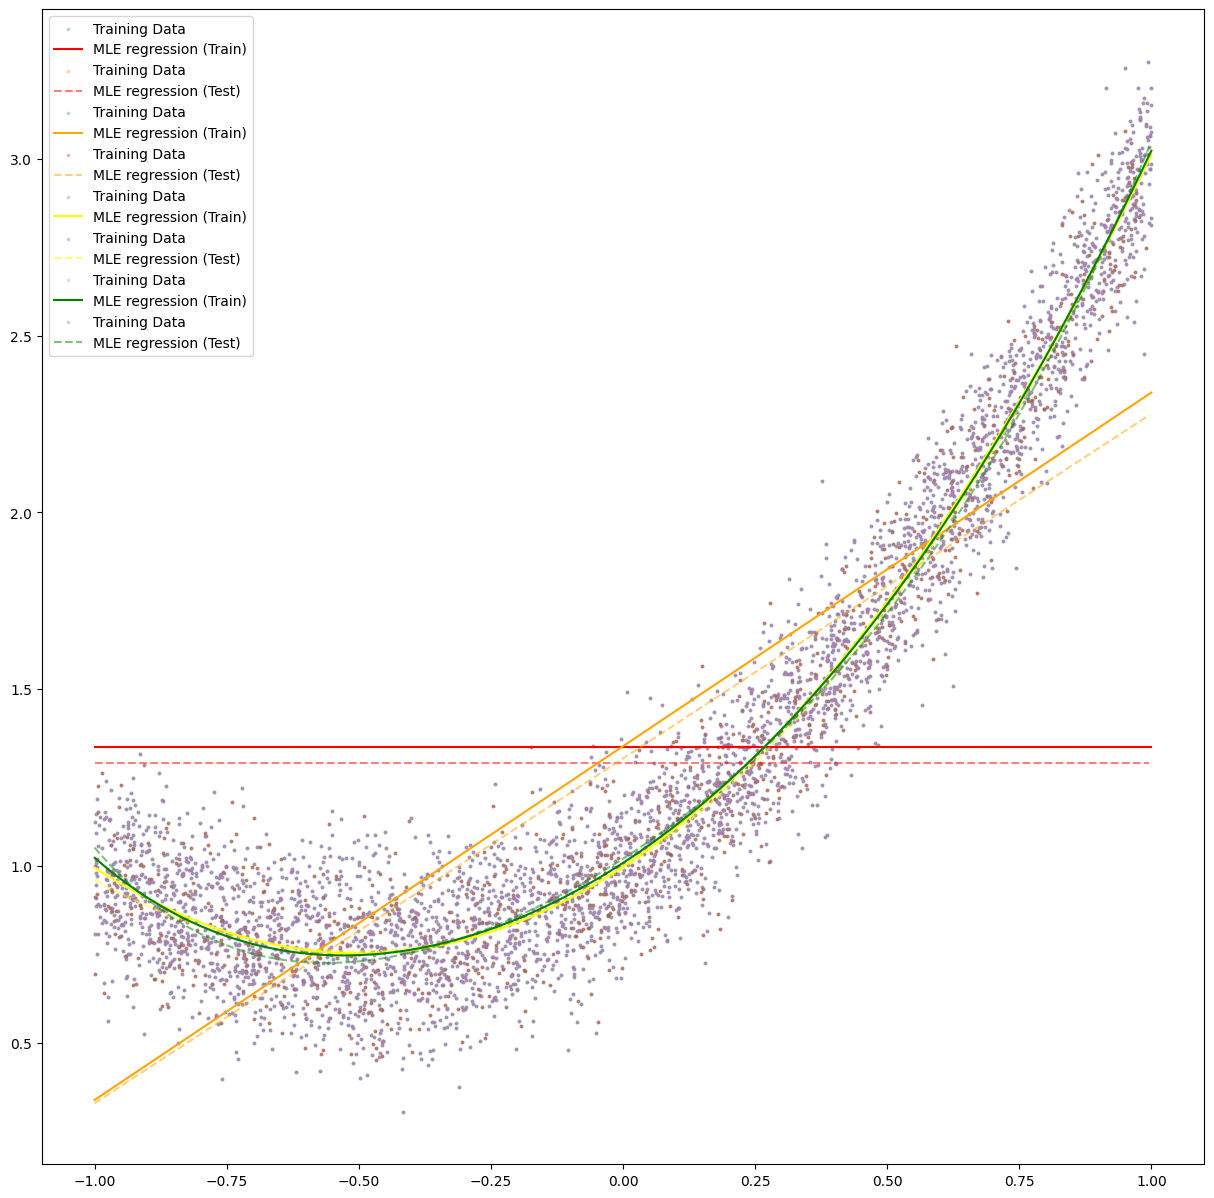

AVG error test K:1 = 0.4280228400588209
AVG error test K:2 = 0.10926559575084742
AVG error test K:4 = 0.01950440056884929
AVG error test K:6 = 0.01973144458122748


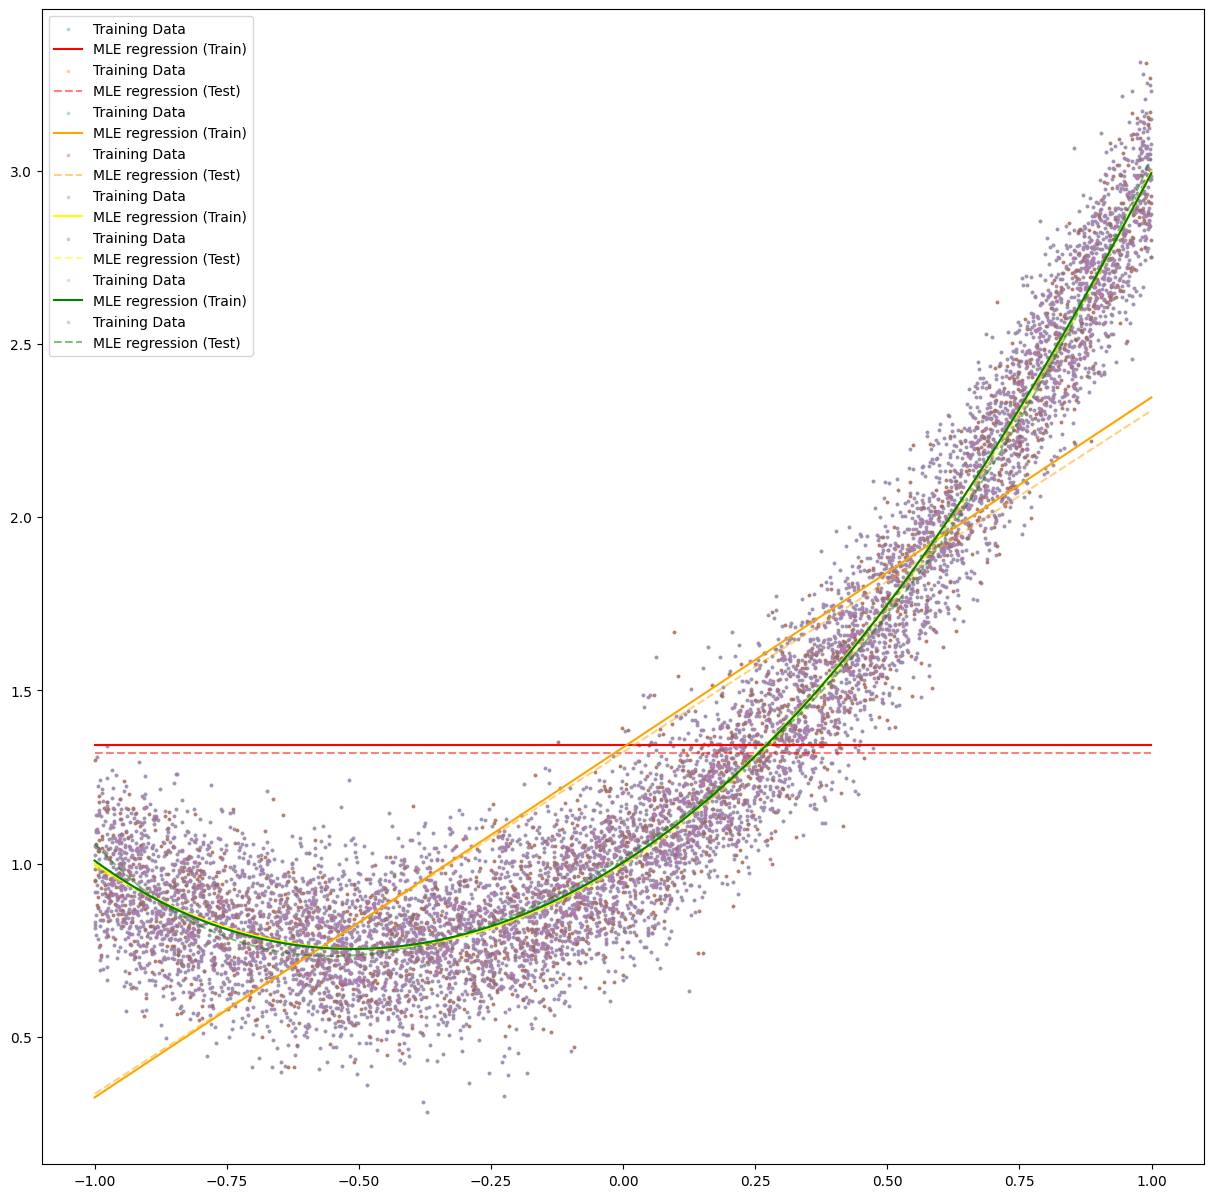

In [117]:
error_test_final = []
error_train_final = []
for N in [100,1000,5000,10000]:
    a, b = -1, 1 
    var = 0.02  
    X, Y, Phi = generate_dataset(3, a, b, var, N)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    theta_mle_train_final = []
    theta_mle_test_final = []
    i = 0
    color_plot = ['red', 'orange','yellow' , 'green']

    plt.figure(figsize=(15,15))
   

    for K in [1,2,4,6]:
        theta_mle_train = mle_solution(X_train, Y_train, K)
        theta_mle_test = mle_solution(X_test, Y_test, K)
        theta_mle_train_final.append(theta_mle_train)
        theta_mle_test_final.append(theta_mle_test_final)
        # Plot del modello
        plot_regression_model(X_train, Y_train, theta_mle_train, K, 'MLE regression (Train)', color_plot[i],'solid', 1.0)
        plot_regression_model(X_test, Y_test, theta_mle_test, K, 'MLE regression (Test)', color_plot[i],'dashed', 0.5)
        
        error_test = avg_absolute_error(theta_mle_test, X_test, Y_test, K)
        error_train = avg_absolute_error(theta_mle_train, X_train, Y_train, K)
        error_train_final.append(error_train)
        error_test_final.append(error_test)
        print(f"AVG error test K:{K} = {error_test}")



        i += 1
    plt.legend()
    plt.show()

In [118]:
j = 0
n = 0
N = [100,1000,5000,10000]
P = [1,2,4,6]
for i in  error_test_final:

    print(f"\nError for N: {N[n]}, K:{P[j]} = {i}")
    j += 1

    if j == 4:
        n += 1
        j=0
        print('______________________________________________')



Error for N: 100, K:1 = 0.5543745132018388

Error for N: 100, K:2 = 0.23293535185375358

Error for N: 100, K:4 = 0.09230352767735717

Error for N: 100, K:6 = 0.06432264609218355
______________________________________________

Error for N: 1000, K:1 = 0.4174597201945064

Error for N: 1000, K:2 = 0.11459285737749182

Error for N: 1000, K:4 = 0.020187820892684626

Error for N: 1000, K:6 = 0.021086738666310726
______________________________________________

Error for N: 5000, K:1 = 0.40156416982032794

Error for N: 5000, K:2 = 0.1045795231059218

Error for N: 5000, K:4 = 0.020218970204458418

Error for N: 5000, K:6 = 0.020896388794907295
______________________________________________

Error for N: 10000, K:1 = 0.4280228400588209

Error for N: 10000, K:2 = 0.10926559575084742

Error for N: 10000, K:4 = 0.01950440056884929

Error for N: 10000, K:6 = 0.01973144458122748
______________________________________________


AVG error test K:2 = 0.1866247808584207
AVG error test K:4 = 0.07088873701186138
AVG error test K:6 = 0.04918804457781585
N: 100     Lamda: 0.1


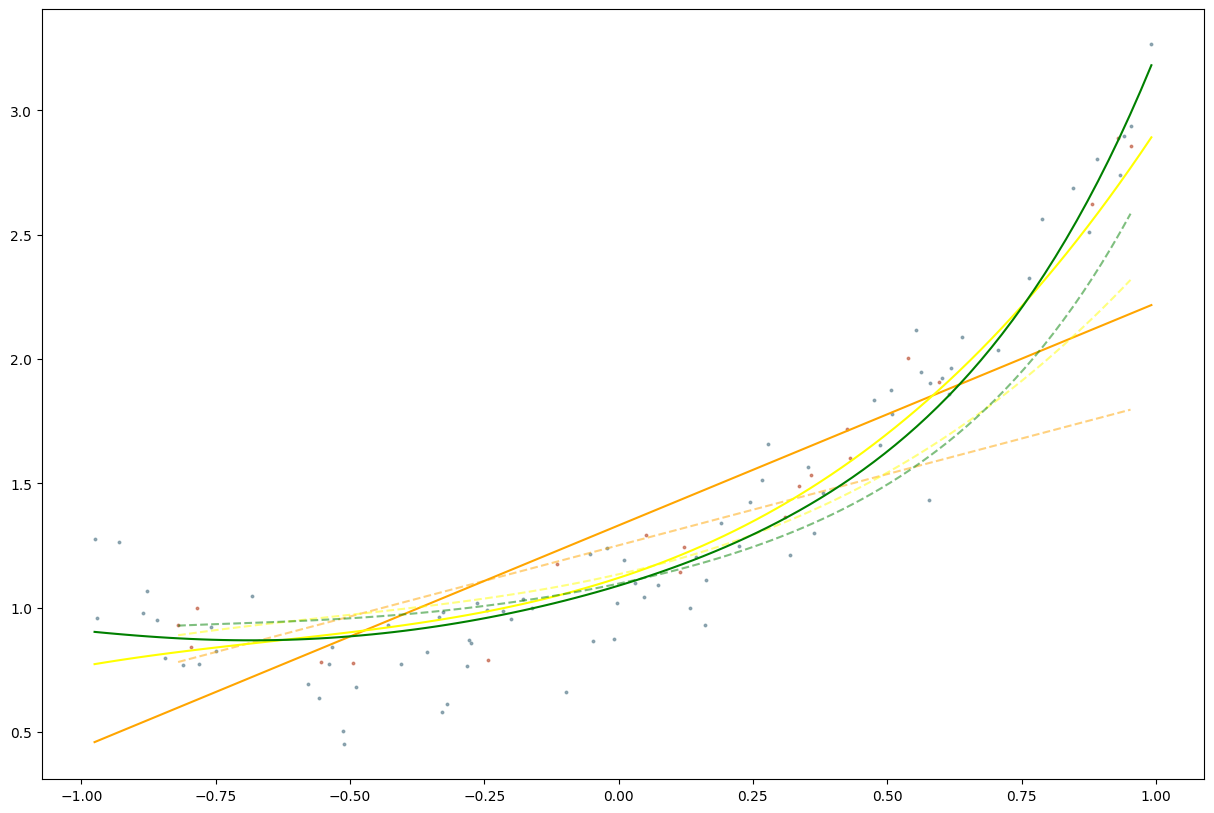

AVG error test K:2 = 0.1936978382049446
AVG error test K:4 = 0.07650349654181737
AVG error test K:6 = 0.053888832422103475
N: 100     Lamda: 0.4


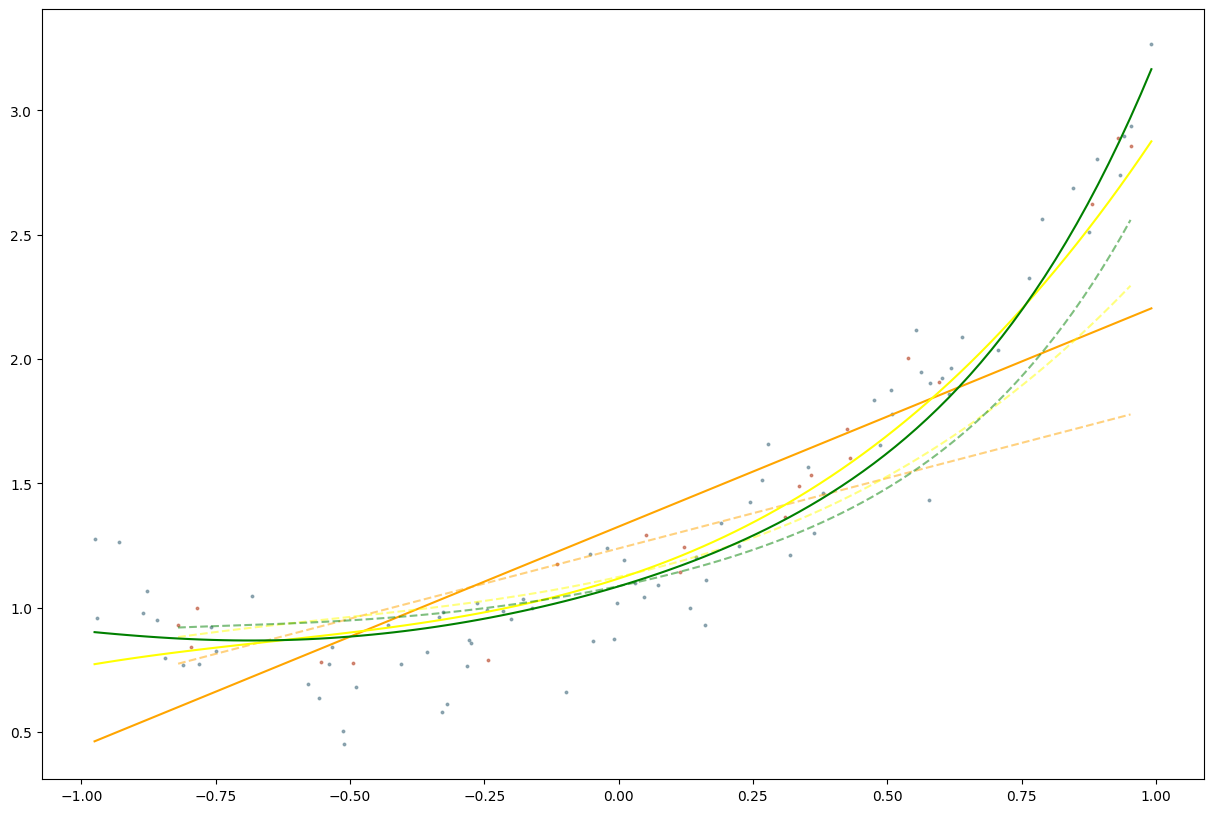

AVG error test K:2 = 0.20102670417172497
AVG error test K:4 = 0.08240724541511674
AVG error test K:6 = 0.058890254261878786
N: 100     Lamda: 0.7


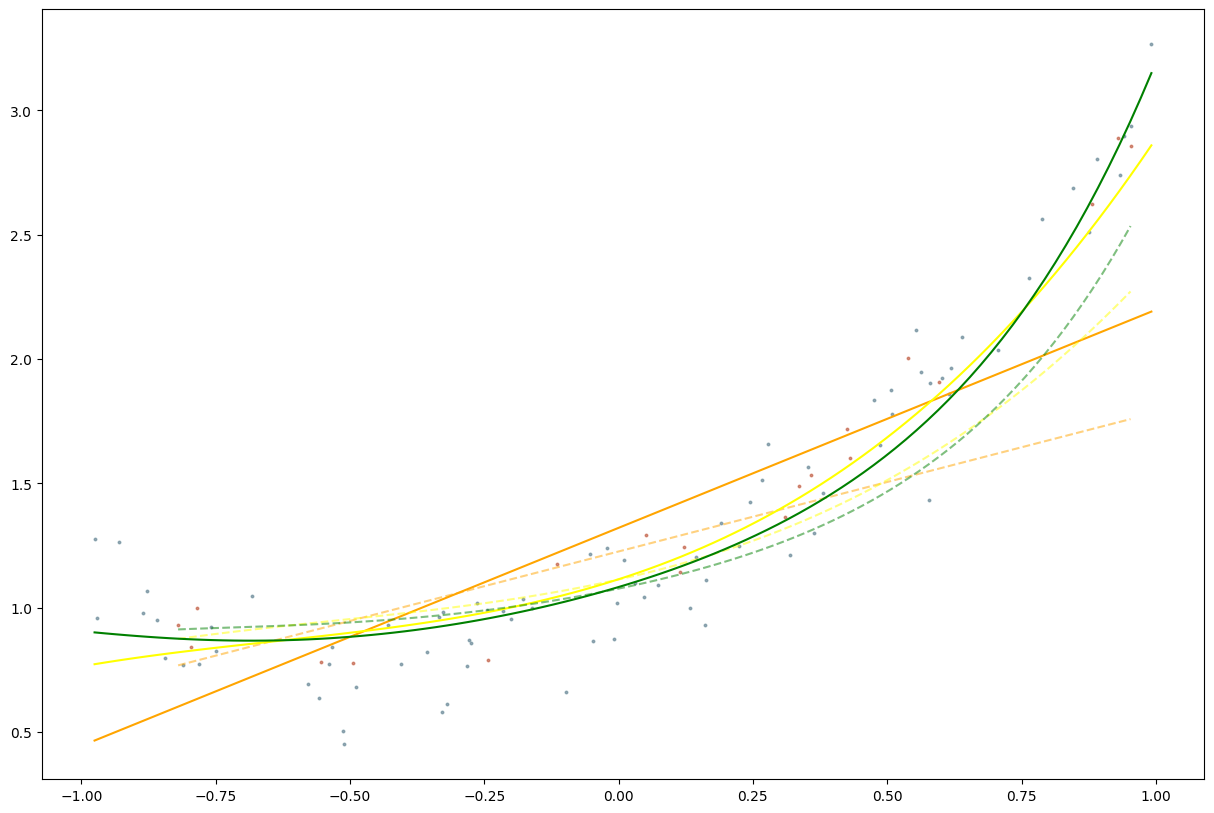

AVG error test K:2 = 0.2085958046712802
AVG error test K:4 = 0.08858407262930768
AVG error test K:6 = 0.06417659307762662
N: 100     Lamda: 1.0


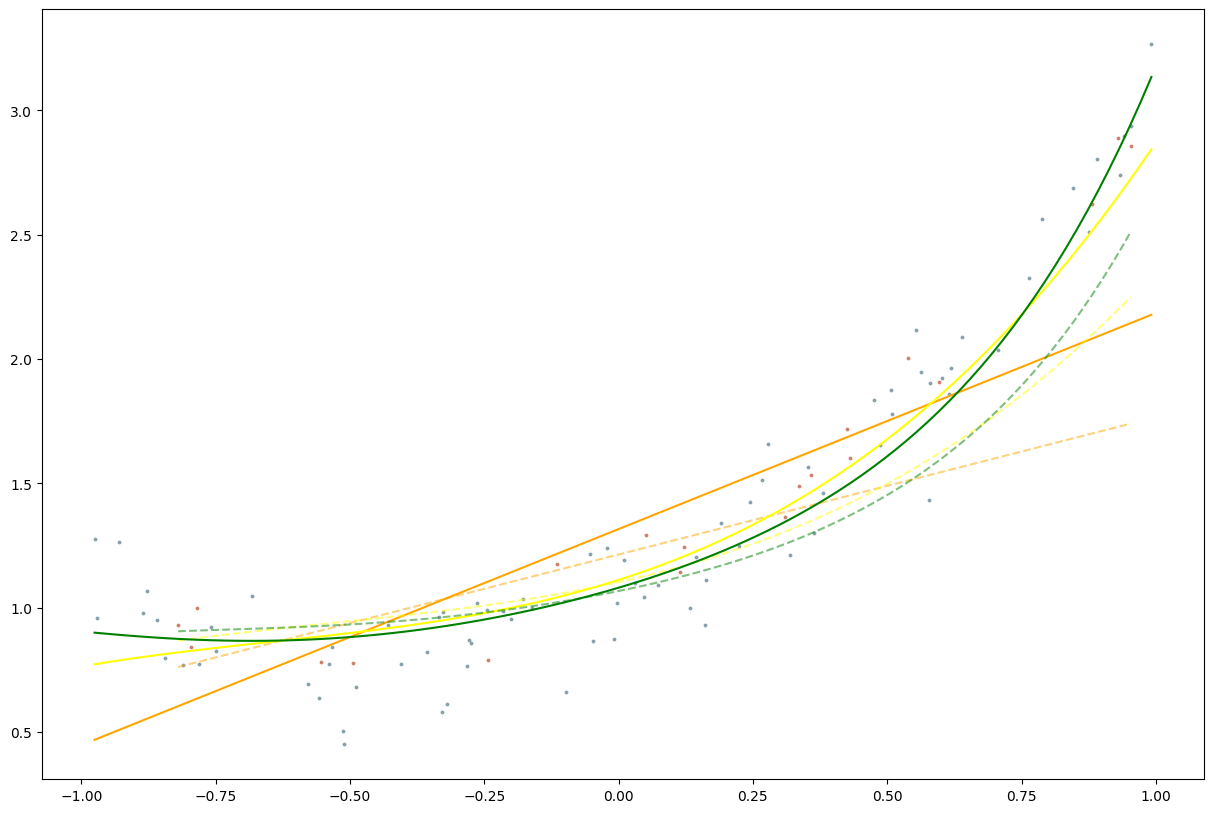

AVG error test K:2 = 0.11505659707849226
AVG error test K:4 = 0.023697252020483447
AVG error test K:6 = 0.023890156527055287
N: 1000     Lamda: 0.1


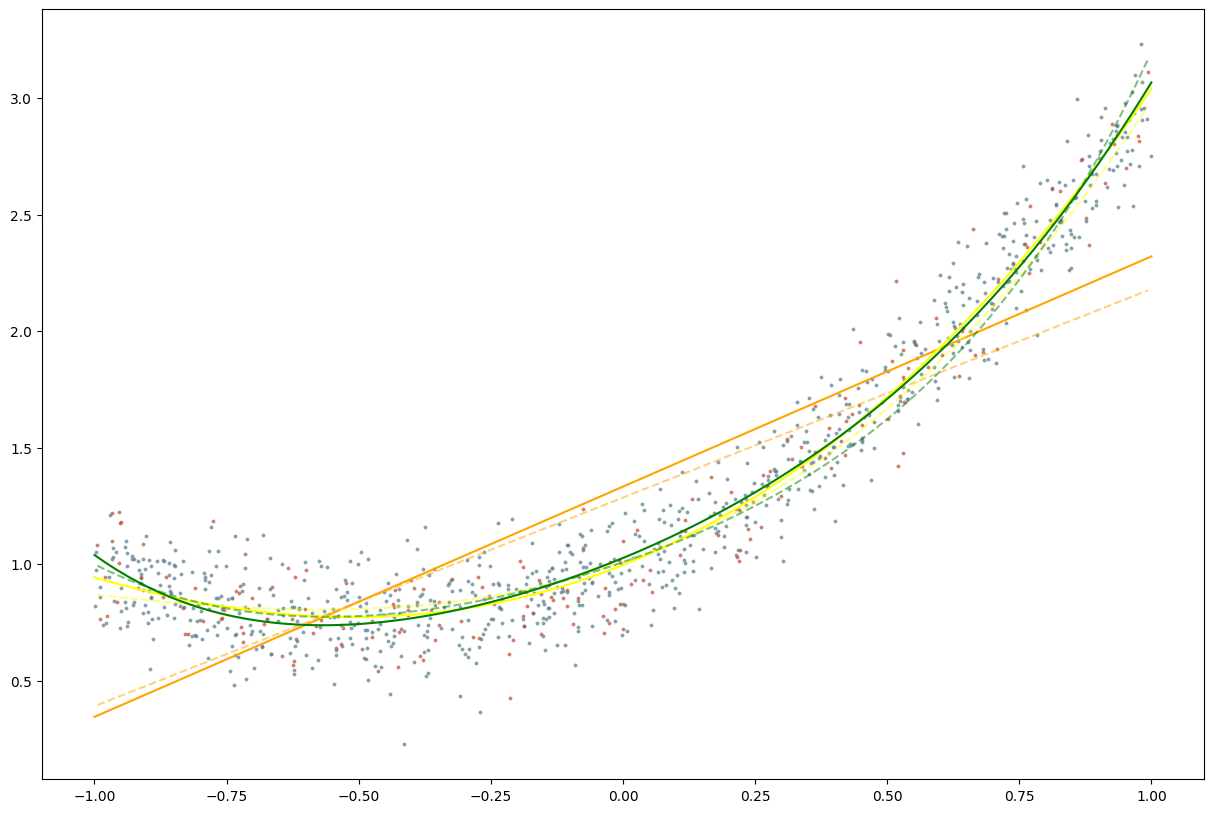

AVG error test K:2 = 0.11508120478169198
AVG error test K:4 = 0.02392878884274098
AVG error test K:6 = 0.024013800312548843
N: 1000     Lamda: 0.4


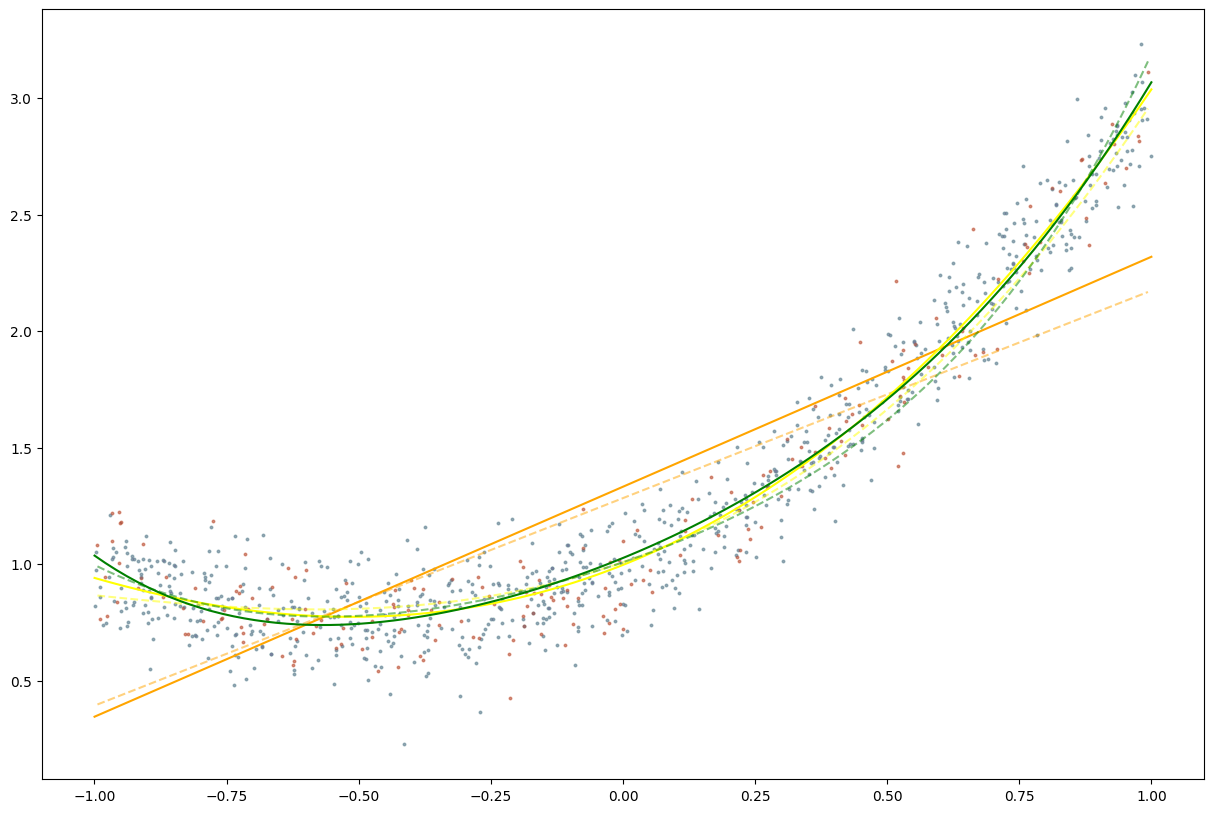

AVG error test K:2 = 0.11512651350154077
AVG error test K:4 = 0.024178509503494906
AVG error test K:6 = 0.024152978629701227
N: 1000     Lamda: 0.7


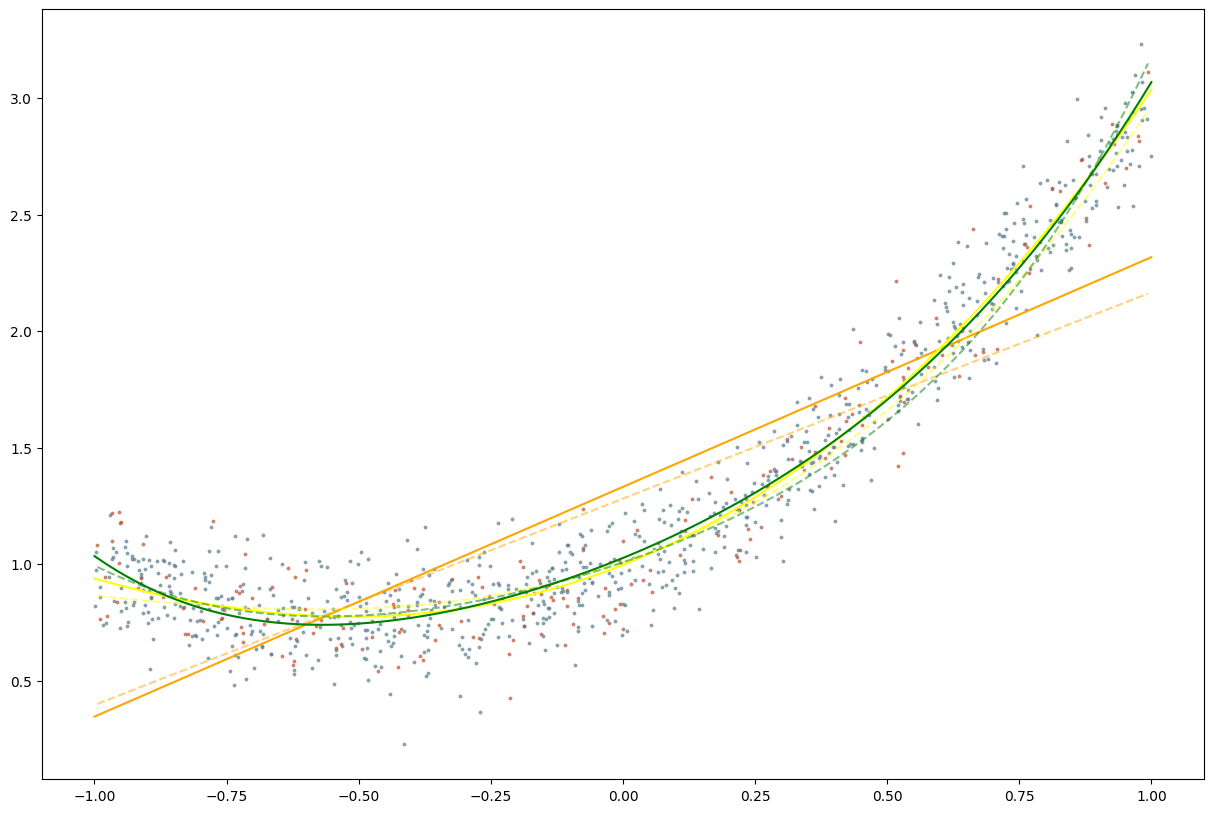

AVG error test K:2 = 0.11519206144176267
AVG error test K:4 = 0.02444586504233963
AVG error test K:6 = 0.02430730869556849
N: 1000     Lamda: 1.0


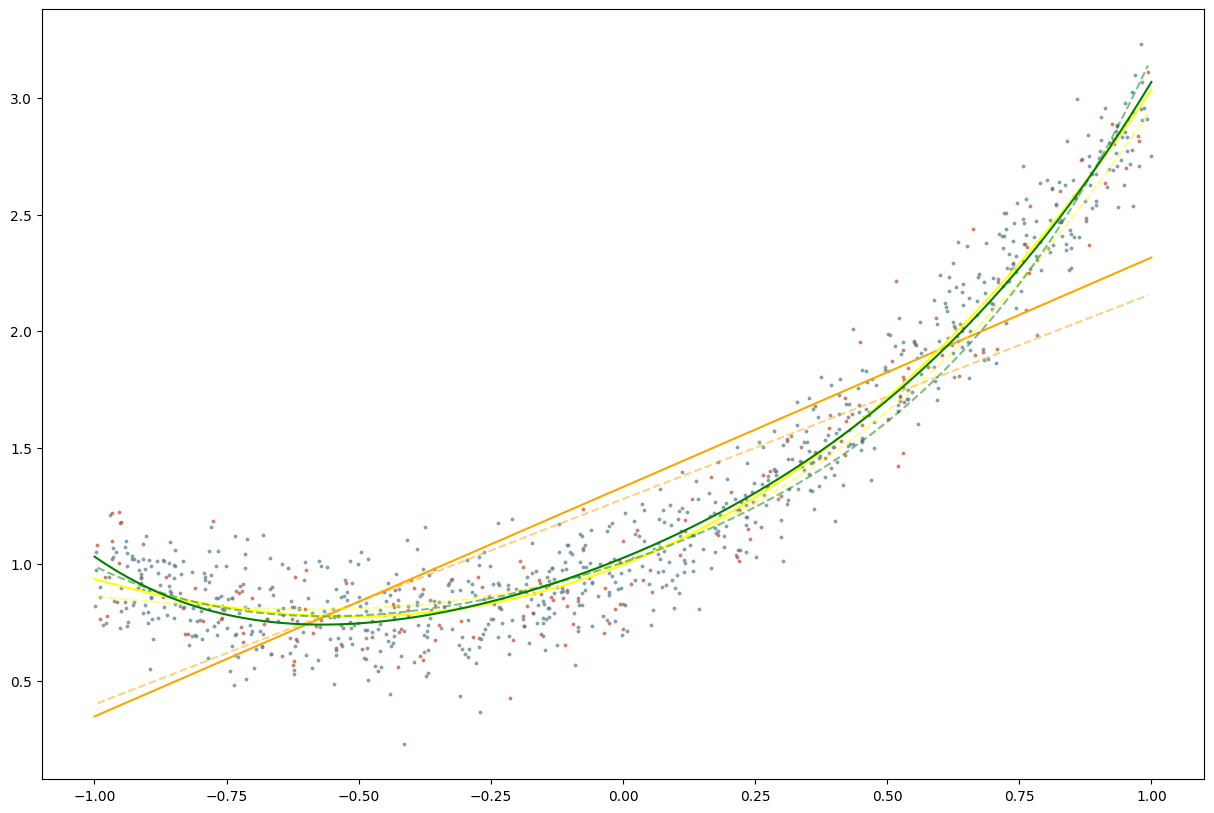

AVG error test K:2 = 0.11130845956469518
AVG error test K:4 = 0.019309290381590197
AVG error test K:6 = 0.019608251204013143
N: 10000     Lamda: 0.1


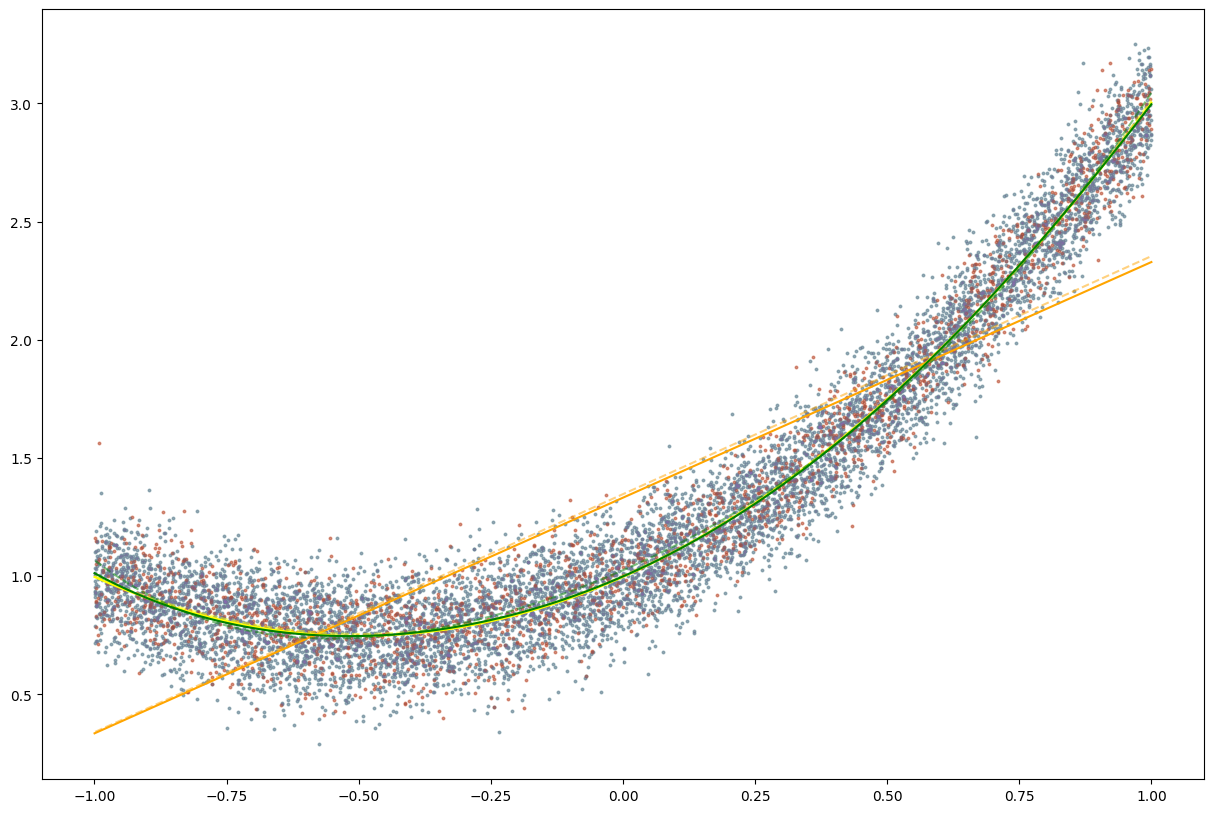

AVG error test K:2 = 0.11130863833610698
AVG error test K:4 = 0.019312560080574942
AVG error test K:6 = 0.019616089112877762
N: 10000     Lamda: 0.4


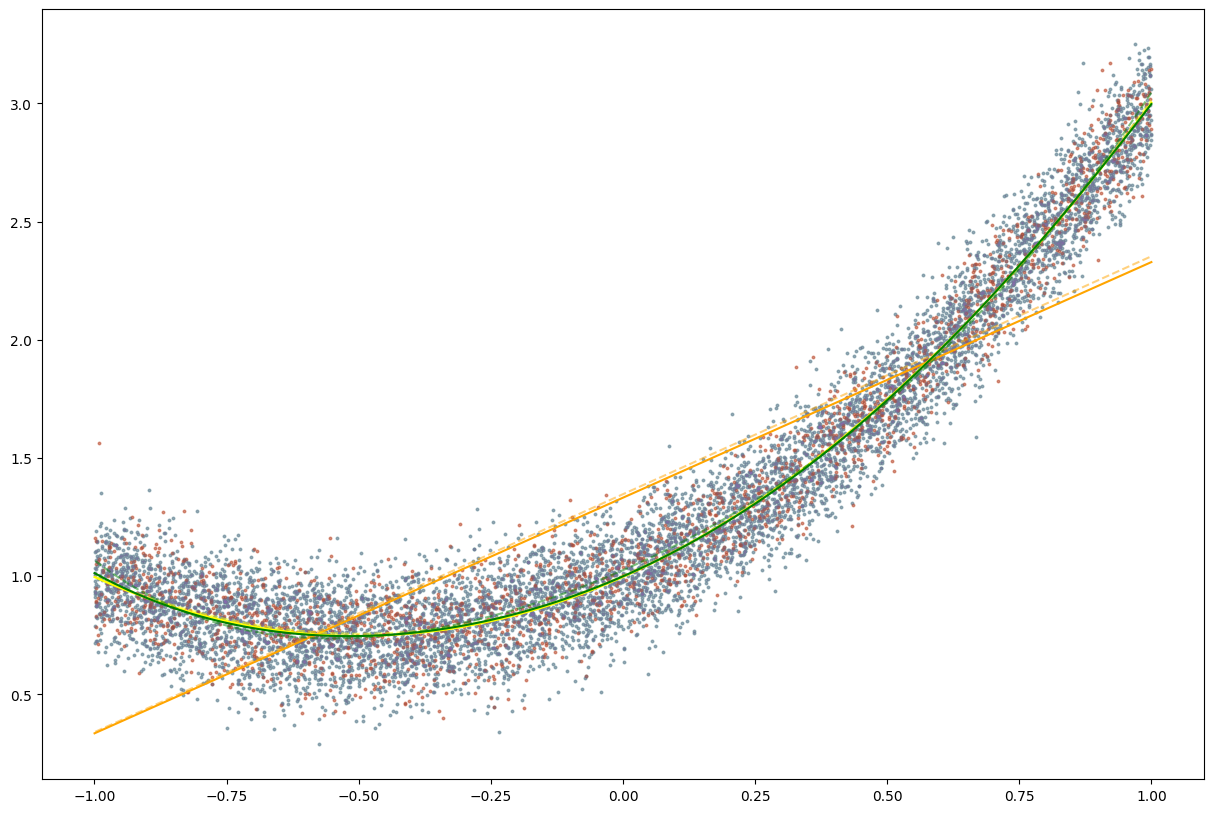

AVG error test K:2 = 0.1113090312679334
AVG error test K:4 = 0.019316662372178068
AVG error test K:6 = 0.01962448878566989
N: 10000     Lamda: 0.7


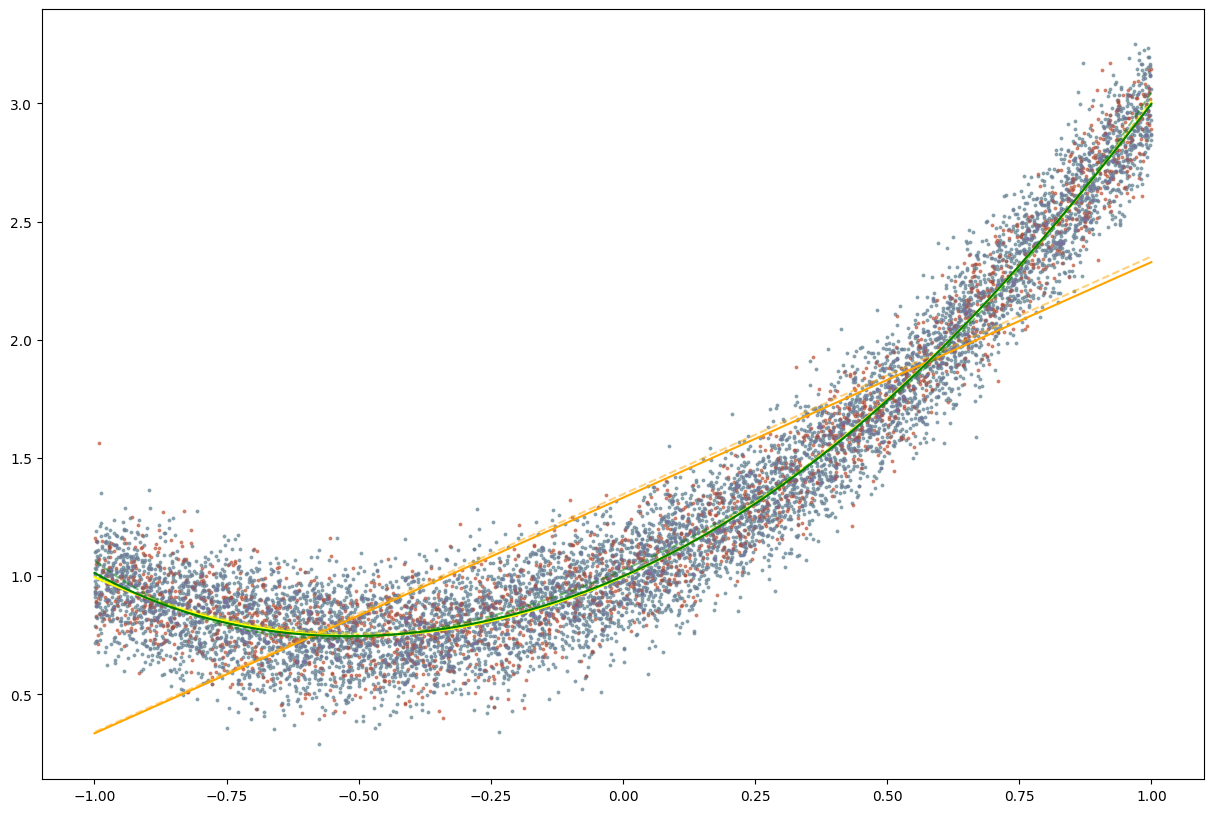

AVG error test K:2 = 0.11130963793957034
AVG error test K:4 = 0.0193215735182293
AVG error test K:6 = 0.01963343585806635
N: 10000     Lamda: 1.0


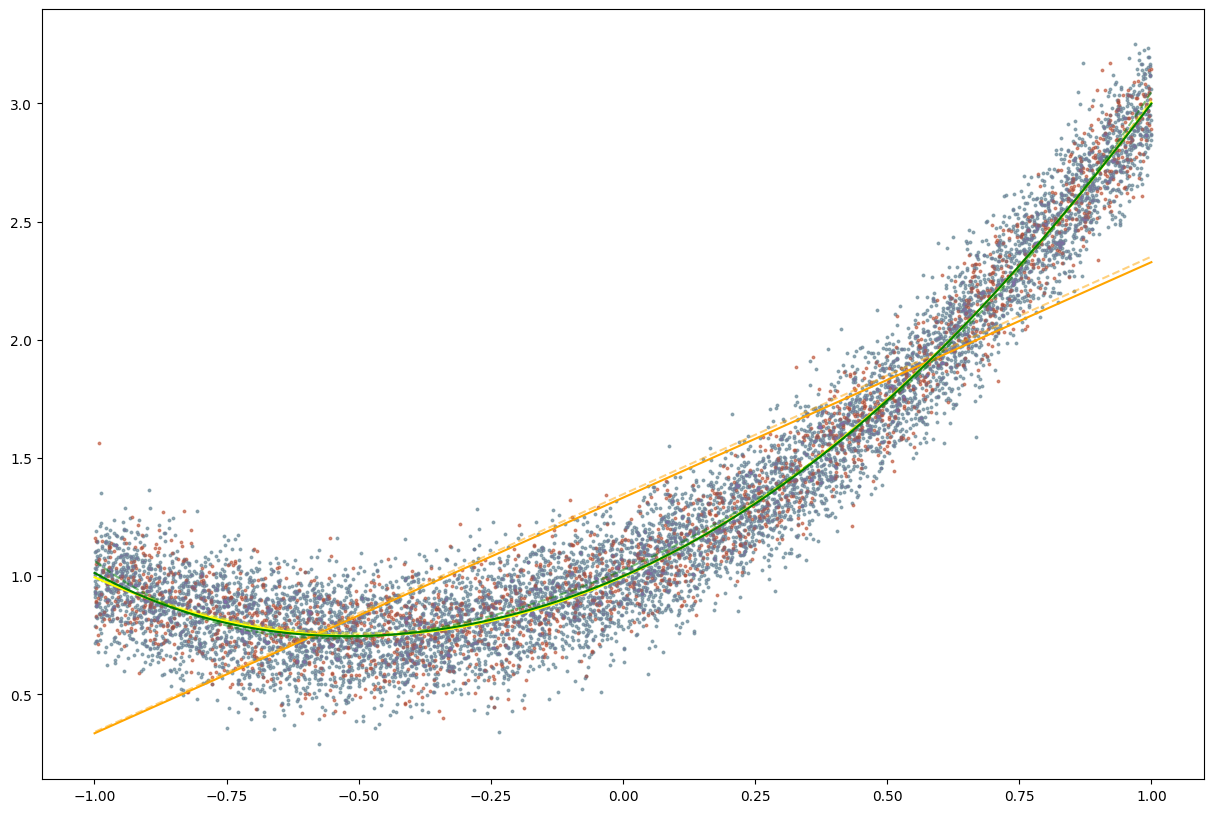

In [120]:
for N in [100,1000,10000]:
    a, b = -1, 1 
    var = 0.02  
    X, Y, Phi = generate_dataset(3, a, b, var, N)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    theta_map_train_final = []
    theta_map_test_final = []
    
    for lambda_value in np.linspace(0.1, 1, 4):
        plt.figure(figsize=(15,10))
        i = 0
        color_plot = ['orange', 'yellow','green']
        for K in [2,4,6]:
            theta_map_train = map_solution(X_train, Y_train, K, lambda_value)
            theta_map_test = map_solution(X_test, Y_test, K, lambda_value)
            theta_map_train_final.append(theta_map_train)
            theta_map_test_final.append(theta_map_test_final)

            plot_regression_model(X_train, Y_train, theta_map_train, K, 'MAP regression (Train)', color_plot[i],'solid', 1.0)
            plot_regression_model(X_test, Y_test, theta_map_test, K, 'MAP regression (Test)', color_plot[i],'dashed', 0.5)
            
            error_test = avg_absolute_error(theta_map_test, X_test, Y_test, K)
            error_train = avg_absolute_error(theta_map_train, X_train, Y_train, K)
            error_train_final_map.append(error_train)
            error_test_final_map.append(error_test)
            i += 1
            print(f"AVG error test K:{K} = {error_test}")

        print(f"N: {N}     Lamda: {lambda_value}")
        plt.show()